In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
def shuffle(X, y):
    n = len(y)
    index = np.arange(0,n,1)
    random.shuffle(index)
    
    x_return=y_return=[]
    for i in range(n):
        print(i,index[i])
        x_return.append(X[index[i]])
        y_return.append(y[index[i]])
    
    return x_return,y_return

In [3]:
#数据处理
def get_data():
    # csv文件预处理
    data = pd.read_csv('spam.csv', encoding='latin-1')
    data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
    data = data.rename(columns = {'v1':'label','v2':'text'})
    data['length'] = data['text'].apply(len)
    data['label_num'] = data.label.map({'ham':0, 'spam':1})
    print('短信分类统计：')
    print(data.label.value_counts())
    
    spam = data[data.label_num == 1]["text"]
    ham = data[data.label_num == 0]["text"]
    m = spam.count()
    n = ham.count()
    
    X_test = spam[:int(m*0.3+1)].append(ham[:int(n*0.3+1)])
    y_test = [1]* (int(m*0.3+1))
    y_test.extend([0]*(int(n*0.3+1)))
    X_train = spam[int(m*0.3+1):].append(ham[int(n*0.3+1):])
    y_train = [1]*(m-int(m*0.3+1))
    y_train.extend([0]*(n-int(n*0.3+1)))
    
    X_train,y_train= shuffle(list(X_train), y_train) 
    X_test,y_test= shuffle(list(X_test), y_test)
    # 划分训练集、测试集
    X_train,X_test,y_train,y_test = train_test_split(
            data["text"],data["label_num"], test_size = 0.3, random_state = 10)
    
    # 训练文本向量化工具
    vect = CountVectorizer(stop_words='english')
    vect.fit(X_train)
    
    # 利用训练好的工具将文本向量化为稀疏矩阵
    X_train_df = vect.transform(X_train)
    X_test_df = vect.transform(X_test)
    
    return X_train_df,X_test_df,list(y_train),list(y_test)

In [4]:
#查准率，召回率以及F1
def score(y,y_pred):
    ss = sn = 0#垃圾邮件被分类为垃圾邮件数目，垃圾邮件被分类为正常邮件数目
    nn = ns = 0#正常邮件被分类为正常邮件数目，正常邮件被分类为垃圾邮件数目
    for i in range(len(y)):
        if int(y[i])==1 and int(y_pred[i])==1:
            ss+=1
        elif int(y[i])==1 and int(y_pred[i])==0:
            sn+=1
        elif int(y[i])==0 and int(y_pred[i])==0:
            nn+=1
        else:
            ns+=1
    precision=ss/(ss+ns)
    recall=ss/(ss+sn)
    #print(ss,sn,nn,ns)
    return 2*precision*recall/(precision+recall)
#        return ss, nn, (ss+nn)/(ss+nn+sn+ns)

X_train,X_test,y_train,y_test = get_data()

短信分类统计：
ham     4825
spam     747
Name: label, dtype: int64
0 2033
1 1215
2 3471
3 3593
4 921
5 2161
6 2076
7 1204
8 400
9 1227
10 1004
11 2414
12 1398
13 1792
14 3508
15 782
16 1896
17 3729
18 483
19 256
20 2843
21 309
22 20
23 2406
24 2388
25 894
26 1198
27 1745
28 449
29 3029
30 3276
31 678
32 2872
33 1459
34 354
35 2673
36 2321
37 3690
38 2486
39 1488
40 1424
41 2005
42 3107
43 296
44 122
45 2579
46 1448
47 2849
48 2126
49 2930
50 597
51 433
52 1354
53 3638
54 2243
55 884
56 82
57 171
58 2584
59 466
60 3698
61 3461
62 520
63 313
64 1485
65 802
66 3811
67 2630
68 2346
69 3663
70 2
71 1818
72 25
73 1059
74 328
75 3215
76 1986
77 2186
78 2597
79 1018
80 2954
81 763
82 3197
83 1332
84 307
85 833
86 1534
87 468
88 3670
89 2152
90 245
91 3273
92 2473
93 1383
94 1133
95 1140
96 1284
97 1744
98 2628
99 2953
100 141
101 2261
102 2866
103 1559
104 3758
105 2658
106 3286
107 3352
108 3742
109 515
110 3088
111 2117
112 470
113 2909
114 740
115 3485
116 1523
117 985
118 2143
119 3767
120 733
12

In [134]:
# 定义分类器
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=2)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
mlp = MLPClassifier(activation='logistic')

clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 
        'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'MLP':mlp}

In [135]:
# 训练、测试分类器
pred_scores = []
pred_acc = []
for k,v in clfs.items():
    v.fit(X_train, y_train)
    pred = v.predict(X_test)
    pred_scores.append((k, [score(y_test,pred)]))
    pred_acc.append((k,v.score(X_test,y_test)))
    
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])

In [136]:
df.plot(kind='bar', ylim=(0.2,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

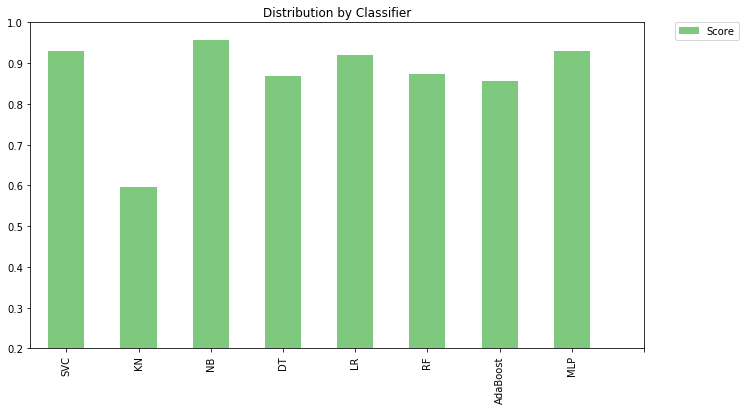

In [137]:
plt.show()

In [138]:
import xgboost as xgb
import sklearn.preprocessing

In [139]:
param = {}
plst = param.items()
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test)
dtest_with_label = xgb.DMatrix(X_test,y_test)
xg = xgb.train(plst,dtrain,10)

In [140]:
xg_result = xg.predict(dtest)

In [141]:
xg_result = sklearn.preprocessing.MinMaxScaler().fit_transform(xg_result)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


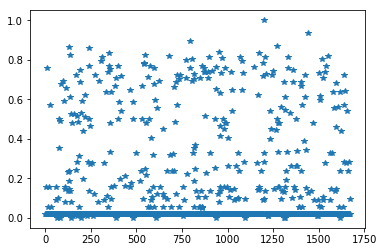

In [142]:
plt.plot(xg_result,'*')
plt.show()

In [143]:
xg_result.round()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [144]:
xg_score = sum(y_test==xg_result.round())/len(y_test)

In [145]:
score(y_test,xg_result.round())

0.7500000000000001

In [146]:
pred_acc

[('SVC', 0.98205741626794263),
 ('KN', 0.92224880382775121),
 ('NB', 0.98863636363636365),
 ('DT', 0.96531100478468901),
 ('LR', 0.97966507177033491),
 ('RF', 0.96949760765550241),
 ('AdaBoost', 0.96351674641148322),
 ('MLP', 0.98205741626794263)]

In [147]:
xg_score

0.94497607655502391

In [148]:
df

,Score
SVC,0.929245
KN,0.596273
NB,0.957494
DT,0.869369
LR,0.919431
RF,0.873449
AdaBoost,0.855107
MLP,0.928910
